# Analyzing Gene Functions in Arabidopsis Thaliana

[The Arabidopsis Information Resource (TAIR)](https://www.arabidopsis.org/) maintains a database of genetic and molecular biology data for the model higher plant Arabidopsis thaliana. We can do all sorts of analyses with this data, but in this post we will focus on looking at gene functions. You can download the annotation data (ATH_GO_GOSLIM.txt.gz) from the TAIR site, but I also included it in my Github repo [mlg556/arabidopsis](https://github.com/mlg556/arabidopsis), so you can just clone that.

First let's import the libraries. We will use [pandas](https://pandas.pydata.org/) for reading/analyzing the data, and `zipfile` to extract the data file, which is archived. You can simply install pandas via `pip install pandas`, and `zipfile` is a built-in python library.

In [1]:
import pandas as pd
import zipfile

We extract the archived file `ATH_GO_GOSLIM.txt.gz` to `ATH_GO_GOSLIM.txt`. Note that although the extension `.gz` suggests Gzip/7zip file, we need a regular zip extractor.

In [2]:
# extract txt, file extension is erroneously gz, but its actually a zip file
fname = "ATH_GO_GOSLIM.txt"
fname_gz = f"{fname}.gz"

with zipfile.ZipFile(fname_gz, 'r') as z:
    z.extractall(".")

The resulting file is txt file using '\t' as a delimiter. The column header names is absent, but we can read that from the companion file `ATH_GO.README.txt`, which I also included in the repo. To read the data into a pandas dataframe, I used `read_csv`. We specify the separator with `sep="\t"`, and the column names. We need skip the first 4 rows because they are comments:

```
!Project_name: The Arabidopsis Information Resource (TAIR)
!URL: http://www.arabidopsis.org
!Contact Email: curator@arabidopsis.org
!Last Updated: 2023-12-01
```

Finally we print the dataframe see what it looks like

In [3]:
# column data from from ATH_GO.README.txt
columns = [
    "locus_name",
    "tair_acc",
    "obj_name",
    "rel_type",
    "go_term",
    "go_id",
    "tair_id",
    "aspect",
    "go_slim",
    "evidence_code",
    "evidence_desc",
    "evidence_with",
    "reference",
    "annotator",
    "date"
]


# read into dataframe
df0 = pd.read_csv(fname, sep="\t", names=columns, skiprows=[0,1,2,3])
df0

,locus_name,tair_acc,obj_name,rel_type,go_term,go_id,tair_id,aspect,go_slim,evidence_code,evidence_desc,evidence_with,reference,annotator,date
0,AT1G01010,locus:2200935,AT1G01010,acts upstream of or within,defense response to other organism,GO:0098542,46569,P,response to stress,IEA,traceable computational prediction,AGI_LocusCode:AT2G43510|AGI_LocusCode:AT4G1473...,Publication:501796011|PMID:34562334,klaasvdp,2022-11-14
1,AT1G01010,locus:2200935,AT1G01010,acts upstream of or within,response to oxidative stress,GO:0006979,6625,P,response to stress,IEA,traceable computational prediction,AGI_LocusCode:AT5G19875,Publication:501796011|PMID:34562334,klaasvdp,2022-11-14
2,AT1G01010,locus:2200935,AT1G01010,acts upstream of or within,response to abscisic acid,GO:0009737,11395,P,response to chemical,IEA,traceable computational prediction,AGI_LocusCode:AT4G27410,Publication:501796011|PMID:34562334,klaasvdp,2022-11-14
3,AT1G01010,locus:2200935,AT1G01010,acts upstream of or within,response to lipid,GO:0033993,28865,P,response to chemical,IEA,traceable computational prediction,AGI_LocusCode:AT4G27410|AGI_LocusCode:AT2G0299...,Publication:501796011|PMID:34562334,klaasvdp,2022-11-14
4,AT1G01010,locus:2200935,AT1G01010,acts upstream of or within,oxoacid metabolic process,GO:0043436,21524,P,other cellular processes,IEA,traceable computational prediction,AGI_LocusCode:AT5G63790,Publication:501796011|PMID:34562334,klaasvdp,2022-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456201,YAK,gene:1945468,YAK,is active in,cellular_component,GO:0005575,163,C,unknown cellular components,ND,'Unknown' cellular component,NONE,Communication:1345790,TAIR,2022-02-01
456202,YAK,gene:1945468,YAK,enables,molecular_function,GO:0003674,3226,F,unknown molecular functions,ND,'Unknown' molecular function,NaN,Communication:1345790,TAIR,2006-10-20
456203,YI,gene:1945470,YI,involved in,biological_process,GO:0008150,5239,P,unknown biological processes,ND,'Unknown' biological process,NONE,Communication:1345790,TAIR,2022-02-01
456204,YI,gene:1945470,YI,is active in,cellular_component,GO:0005575,163,C,unknown cellular components,ND,'Unknown' cellular component,NONE,Communication:1345790,TAIR,2022-02-01


As you can see, this is a quite large dataframe with $456\,206$ genes and their associated functions. The `go_term` column is a nice description of what the gene does, so we will use that. I have also noticed that there are 3 GO terms we need to exclude, because they are very generic and not useful: `["molecular_function", "biological_process", "cellular_component"]`.

We select the columns by indexing into the dataframe, drop duplicates, and finally drop the rows which contain the excluded go_terms with `query()`. We could also use indexing for this, but query looks nicer I think.

In [4]:
select_columns = ["locus_name", "go_term"]

excluded_go_terms = ["molecular_function", "biological_process", "cellular_component"]

df = df0[select_columns] # select gene name and function
df = df.drop_duplicates() # drop duplicates
df = df.query("go_term not in @excluded_go_terms") # exclude go_terms

df

,locus_name,go_term
0,AT1G01010,defense response to other organism
1,AT1G01010,response to oxidative stress
2,AT1G01010,response to abscisic acid
3,AT1G01010,response to lipid
4,AT1G01010,oxoacid metabolic process
...,...,...
456175,XRS9,DNA damage response
456176,XRS9,DNA repair
456182,XRS9,response to X-ray
456183,XTC1,embryo development ending in seed dormancy


We are left with a table $175\,917$  of genes with their corresponding functions, but I want to analyze them by function. Let's see which functions are done by which genes. We do this by using `groupby`:

In [5]:
dfg = df.groupby("go_term", as_index=False).apply(lambda x: x)
dfg

locus_name                                      go_term
0    59240   AT1G36280           'de novo' AMP biosynthetic process
     264420  AT3G57610           'de novo' AMP biosynthetic process
     301471  AT4G18440           'de novo' AMP biosynthetic process
1    52413   AT1G30820           'de novo' CTP biosynthetic process
     161072  AT2G34890           'de novo' CTP biosynthetic process
...                ...                                          ...
7460 97088   AT1G69770  zygote asymmetric cytokinesis in embryo sac
     118068  AT2G01210  zygote asymmetric cytokinesis in embryo sac
     412150  AT5G49160  zygote asymmetric cytokinesis in embryo sac
7461 129874  AT2G17090                            zygote elongation
     157944  AT2G33160                            zygote elongation

[175917 rows x 2 columns]

We see that, for example *'de novo' AMP biosynthetic process* is regulated by three different genes: AT1G36280, AT3G57610 and AT4G18440. We can see which functions are regulated by the most number of genes using grouby combined with count, and sort them in descending order:

In [6]:
dfg_sum = df.groupby("go_term").count()
dfg_sum = dfg_sum.sort_values(by=['locus_name'], ascending=False)
dfg_sum

,locus_name
go_term,
nucleus,10494
chloroplast,4966
cytoplasm,4771
protein binding,4519
mitochondrion,4449
...,...
organelle fission,1
"beta,beta digalactosyldiacylglycerol galactosyltransferase activity",1
regulation of MAPK cascade,1


This is nice, but not very helpful. Go terms like *nucleus* and *protein binding* seem to me too broad to be meaningful. Of course at the other end we have very specific functions regulated by a single gene. I would like to see more of what's in between, so let's look at the distribution:

In [ ]:
import matplotlib.pyplot as plt

In [45]:
dfg_sum.iloc[:50]['locus_name']

go_term
nucleus                                        10494
chloroplast                                     4966
cytoplasm                                       4771
protein binding                                 4519
mitochondrion                                   4449
extracellular region                            2986
plasma membrane                                 2944
cytosol                                         2492
regulation of DNA-templated transcription       1859
DNA-binding transcription factor activity       1616
RNA metabolic process                           1334
response to water deprivation                   1182
mRNA binding                                    1161
response to light stimulus                      1147
defense response to bacterium                   1073
Golgi apparatus                                 1053
regulation of gene expression                   1043
membrane                                        1042
response to abscisic acid             

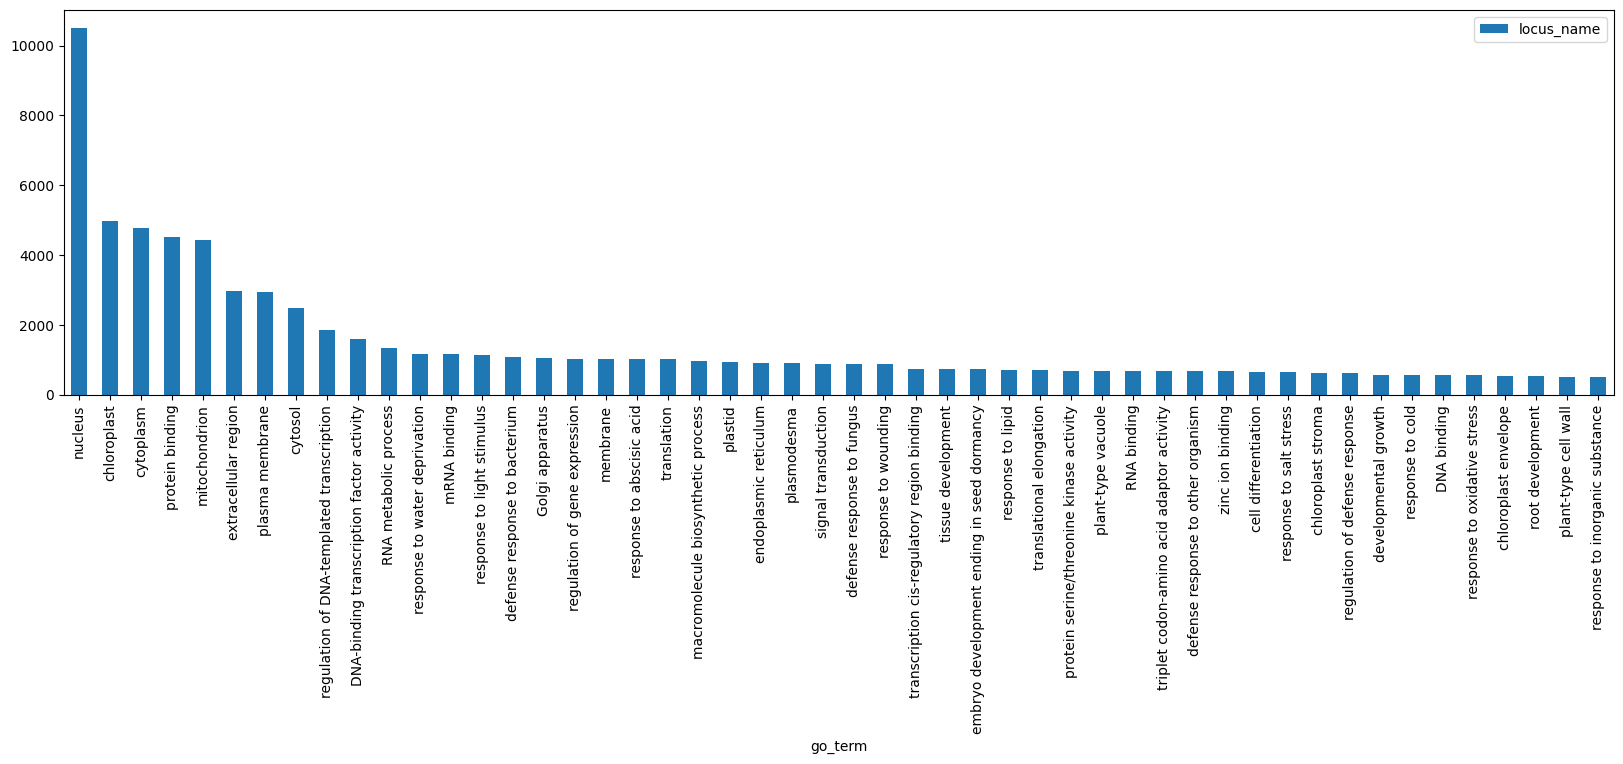

In [51]:
distribution = dfg_sum.iloc[:50].plot.bar(figsize=(20, 5))

Apart from the usual suspects, the more interesting functions to me are "response to water deprivation", "response to light stimulus" and "response to abscisic acid". We see that the type of things which are more important to a plant have more genes to express/regulate them. Abscisic acid is a *plant hormone that regulates numerous aspects of plant growth, development, and stress responses.*

Another thing worthy of notice is that the distribution seems to follow a [*power law*](https://en.wikipedia.org/wiki/Power_law) and the [*Pareto principle*](https://en.wikipedia.org/wiki/Pareto_principle). I don't know if this is to be expected or not.

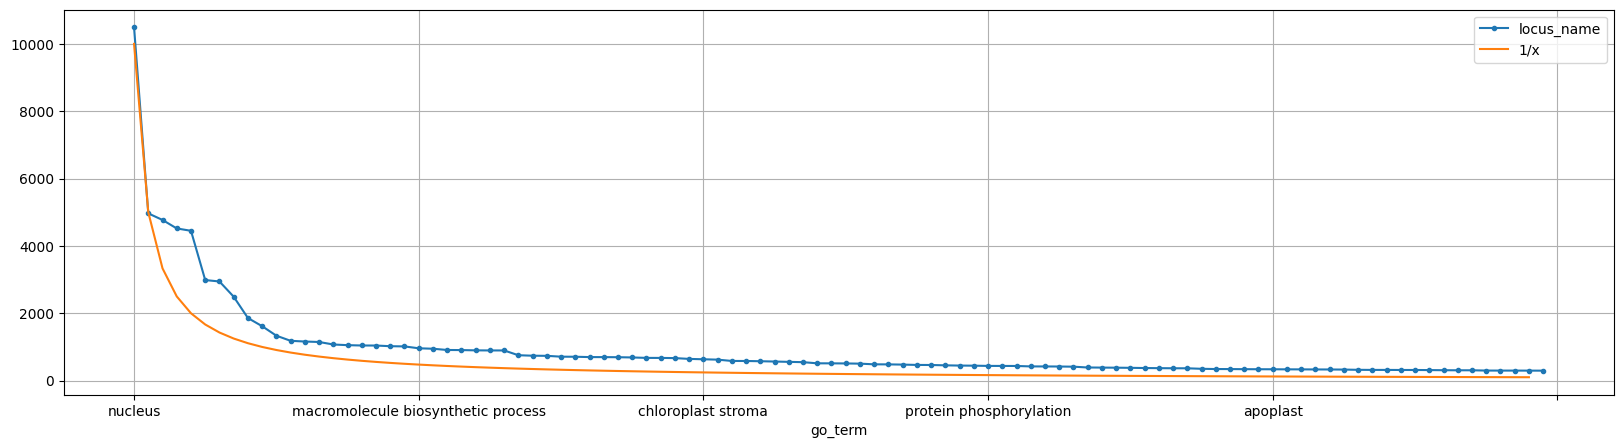

In [64]:
plot = dfg_sum.iloc[:100].plot(figsize=(20, 5), marker=".", grid=True)
plot.plot([10_000/x for x in range(1,100)])
_ = plot.legend(["locus_name", "1/x"])

# Citations

* Berardini, TZ, Mundodi, S, Reiser, R, Huala, E, Garcia-Hernandez, M, Zhang, P, Mueller, LM, Yoon, J, Doyle, A, Lander, G, Moseyko, N, Yoo, D, Xu, I, Zoeckler, B, Montoya, M, Miller, N, Weems, D, and Rhee, SY (2004) Functional annotation of the Arabidopsis genome using controlled vocabularies. Plant Physiol. 135(2):1-11.

* TAIR Terms of Use: http://www.arabidopsis.org/doc/about/tair_terms_of_use/417.